# 1. Matrizes

Dimensão da imagem: (2713, 2036)


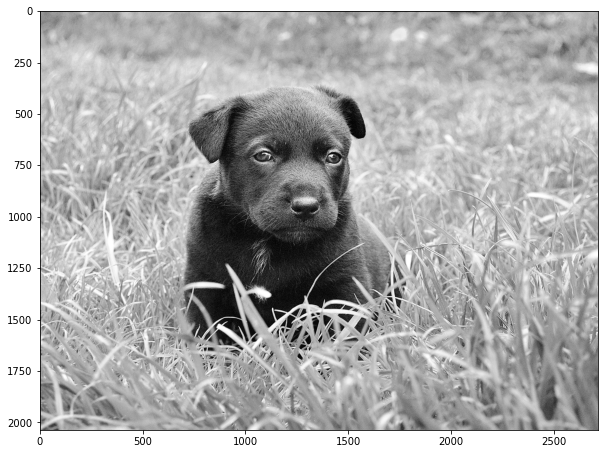

In [49]:
import PIL
import matplotlib.pyplot as plt

img = PIL.Image.open("img/dog.jpg").convert("L")
print(f"Dimensão da imagem: {img.size}")
plt.figure(figsize = (10,10))
plt.imshow(img, cmap='gray')
plt.savefig('dog_matrix.png')
plt.show()

In [35]:
from PIL import Image
import numpy as np

img = np.asarray(Image.open('img/dog.jpg').convert('L'))
print(img)

[[150 158 154 ... 173 175 171]
 [161 159 152 ... 169 172 182]
 [164 163 163 ... 173 176 180]
 ...
 [201 181 173 ...  90  86  91]
 [191 166 164 ...  97  81  78]
 [180 162 164 ... 118  92  94]]


Dimensão da imagem: (2036, 2713, 3)


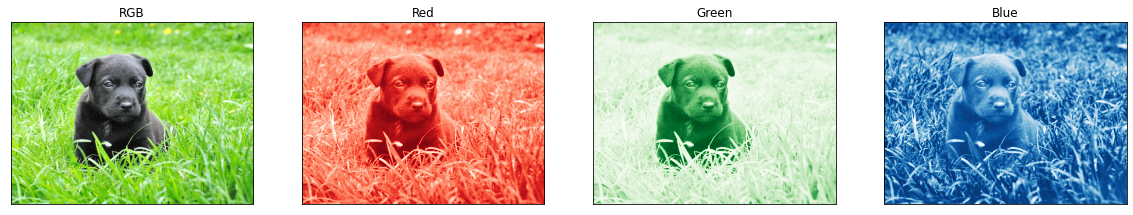

In [40]:
# Busca imagem e analisa dimensões
img = plt.imread('img/dog.jpg')
print(f"Dimensão da imagem: {img.shape}")

# Criação da figura e dos objetos
titles = ['RGB', 'Red', 'Green', 'Blue']
cmaps = [None, plt.cm.Reds_r, plt.cm.Greens_r, plt.cm.Blues_r]
fig, axes = plt.subplots(1, 4, figsize=(20,5))
objs = zip(axes, (img, *img.transpose(2,0,1)), titles, cmaps)

# Visualização da imagem por canal de cor
for ax, channel, title, cmap in objs:
    ax.imshow(channel, cmap=cmap)
    ax.set_title(title)
    ax.set_xticks(())
    ax.set_yticks(())

Primeiro pixel: [109 191  45]


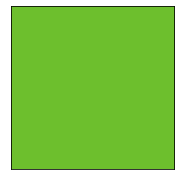

In [48]:
img = np.asarray(Image.open('img/dog.jpg'))
pixel = img[0,0]
print(f"Primeiro pixel: {pixel}")
plt.figure(figsize = (3,3))
fig = plt.imshow([[pixel]])
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

# 2. Trigonometria

In [6]:
from datetime import datetime, timedelta
import pandas as pd

today = datetime.today().strftime("%Y-%m-%d 00:00")
start_date = datetime.strptime(today, "%Y-%m-%d 00:00")
end_date = start_date + timedelta(hours=24)
df = pd.DataFrame(pd.date_range(start_date, end=end_date, freq="H"), columns=["data"])
df['hora'] = df.data.dt.hour
df.tail()

,data,hora
20,2021-11-02 20:00:00,20
21,2021-11-02 21:00:00,21
22,2021-11-02 22:00:00,22
23,2021-11-02 23:00:00,23
24,2021-11-03 00:00:00,0


In [7]:
df['sen'] = np.sin(2 * np.pi * df['hora']/23)
df['cos'] = np.cos(2 * np.pi * df['hora']/23)
df.tail()

,data,hora,sen,cos
20,2021-11-02 20:00:00,20,-7.308360e-01,0.682553
21,2021-11-02 21:00:00,21,-5.195840e-01,0.854419
22,2021-11-02 22:00:00,22,-2.697968e-01,0.962917
23,2021-11-02 23:00:00,23,-2.449294e-16,1.000000
24,2021-11-03 00:00:00,0,0.000000e+00,1.000000


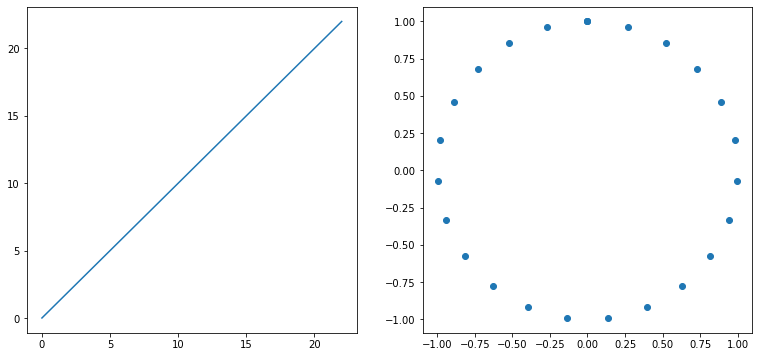

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 6))
axes[0].plot(df.hora[0:23])
axes[1].scatter(df['sen'], df["cos"])
plt.show()

# 3. f(x) = ax + b

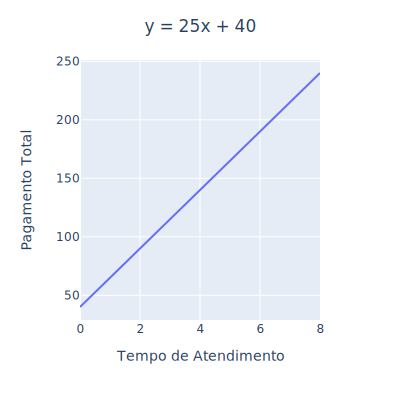

In [23]:
import plotly.express as px

x = np.linspace(0, 8, 100)
y = 25 * x + 40

fig = px.line(df,
              x=x,
              y=y,
              labels={
                  "y": "Pagamento Total",
                  "x": "Tempo de Atendimento"
              })
fig.update_layout(title_text="y = 25x + 40",
                  title_x=0.5,
                  title_y=0.95,
                  height=400,
                  width=400)
fig.write_image("salary_data.png")
fig.show("svg")

In [10]:
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


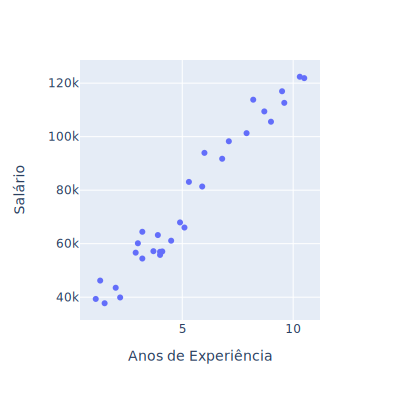

In [24]:
fig = px.scatter(df,
                 x="YearsExperience",
                 y="Salary",
                 labels={
                     "Salary": "Salário",
                     "YearsExperience": "Anos de Experiência"
                 })
fig.update_layout(height=400, width=400)
fig.write_image("salary_data.png")
fig.show("svg")

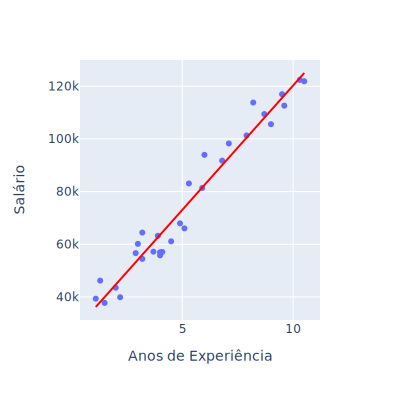

In [25]:
import plotly.graph_objects as go

# Divisão das variáveis
X = df[['YearsExperience']]
y = df[["Salary"]]

# Visualização dos dados e da reta
fig = px.scatter(
    df,
    x="YearsExperience",
    y="Salary",
    trendline="ols",
    labels={
        "Salary": "Salário",
        "YearsExperience": "Anos de Experiência"
    })
lr = px.get_trendline_results(fig)
fig.data[1].line.color = 'red'
fig.update_layout(height=400, width=400)
fig.show("svg")

In [16]:
a = lr.iloc[0]["px_fit_results"].params[1]
b = lr.iloc[0]["px_fit_results"].params[0]
x = 10

print(f"Inclinação: {round(a, 2)}")
print(f"Intercepto: {round(b, 2)}")
print(f"Salário em 10 anos: {round((x*a) + b, 2)}") 

Inclinação: 9449.96
Intercepto: 25792.2
Salário em 10 anos: 120291.82


# Referências

- https://www.kaggle.com/karthickveerakumar/salary-data-simple-linear-regression
- https://towardsdatascience.com/cyclical-features-encoding-its-about-time-ce23581845ca
- https://towardsdatascience.com/beginners-introduction-to-matrices-bd39289cc66a